In [2]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import show

import sklearn.preprocessing as preprocessing

%matplotlib inline
sns.set_context('notebook')
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', 500) # to see all columns

In [4]:
data = pd.read_csv('CrowdstormingDataJuly1st_preprocessed.csv')
data_total = data.copy()
print('Number of dayads', data.shape)
data.head()

Number of dayads (124468, 30)


,Unnamed: 0,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,photoID,rater1,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,color_rating
0,0,901,1046,70,3,1382,177.0,72.0,0,1,0,0,1,0,0,0,0,1532,0.25,0.50,1,1,59,0.326391,712.0,0.000564,0.396000,750.0,0.002696,1
1,1,739,919,51,1,320,179.0,82.0,12,1,0,0,1,0,1,0,0,497,0.75,0.75,2,2,153,0.203375,40.0,0.010875,-0.204082,49.0,0.061504,3
2,5,0,392,34,0,360,182.0,71.0,1,1,0,0,1,0,0,0,0,1081,0.25,0.00,4,4,87,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0
3,6,45,425,48,0,446,187.0,80.0,7,1,1,0,0,0,0,0,0,1175,0.00,0.25,4,4,87,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0
4,7,64,440,54,0,158,180.0,68.0,4,1,0,0,1,0,0,0,0,803,1.00,1.00,4,4,87,0.325185,127.0,0.003297,0.538462,130.0,0.013752,4


In [5]:
print('Number of diad: ', len(data))
print('Number of players: ', len(data.playerShort.unique()))
print('Number of referees: ', len(data.refNum.unique()))

Number of diad:  124468
Number of players:  1585
Number of referees:  2967


# 2. Train the model  

Now we train and test our model using cross-validation. First of all we must encode all the features that contains string.

For this first model, we will use all the features (except rater1,rater2, color_rating) and then we will observe which are the most important features
 

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing as pp
from sklearn.model_selection import KFold , cross_val_score
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score

In [7]:
# encoders
le = pp.LabelEncoder() # for playernames etc.
ohe = pp.OneHotEncoder() # for categories with 'few' categories

In [9]:
rf_input_data = data.copy()
player_colors = rf_input_data['color_rating']
rf_input_data = rf_input_data.drop(['rater1', 'rater2', 'color_rating'], axis=1) 

rf_input_data.dtypes

Unnamed: 0         int64
playerShort        int64
player             int64
club               int64
leagueCountry      int64
birthday           int64
height           float64
weight           float64
position           int64
games              int64
victories          int64
ties               int64
defeats            int64
goals              int64
yellowCards        int64
yellowReds         int64
redCards           int64
photoID            int64
refNum             int64
refCountry         int64
Alpha_3            int64
meanIAT          float64
nIAT             float64
seIAT            float64
meanExp          float64
nExp             float64
seExp            float64
dtype: object

In [10]:
rf = RandomForestClassifier()
# roc_scorer = make_scorer(roc_curve)
X = rf_input_data
y = player_colors
result = cross_val_score(rf, X, y, cv=10, n_jobs=3, pre_dispatch='n_jobs+1', verbose=3)

"""
kf = KFold(n_splits=10)
for train, test in kf.split(rf_input_data):
    X_train, X_test, y_train, y_test = rf_input_data[train], rf_input_data[test], player_colors[train], player_colors[test]
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
"""

result

[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV] ....................................... , score=0.893887 -   0.1s
[CV]  ................................................................
[CV] ....................................... , score=0.903526 -   0.1s
[CV]  ................................................................
[CV] ....................................... , score=0.903197 -   0.1s
[CV]  ................................................................
[CV] ....................................... , score=0.895709 -   0.1s
[CV]  ................................................................
[CV] ....................................... , score=0.902876 -   0.1s
[CV]  ................................................................
[CV] ....................................... , score=0.903664 -   0.1s
[CV]  

[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:   19.4s finished


array([ 0.89388706,  0.90352639,  0.9031973 ,  0.90287596,  0.89570946,
        0.90366383,  0.90221758,  0.90768118,  0.9017355 ,  0.81565413])

## Observe the important features

Feature ranking:
1. feature n° 16 photoID (0.121465)
2. feature n° 1 player (0.116455)
3. feature n° 4 birthday (0.107641)
4. feature n° 0 playerShort (0.105967)
5. feature n° 2 club (0.095871)
6. feature n° 5 height (0.093122)
7. feature n° 6 weight (0.092604)
8. feature n° 7 position (0.072177)
9. feature n° 17 refNum (0.042796)
10. feature n° 3 leagueCountry (0.031501)
11. feature n° 8 games (0.014344)
12. feature n° 9 victories (0.013300)
13. feature n° 11 defeats (0.010950)
14. feature n° 10 ties (0.009832)
15. feature n° 22 seIAT (0.007753)
16. feature n° 24 nExp (0.007667)
17. feature n° 13 yellowCards (0.007566)
18. feature n° 12 goals (0.007535)
19. feature n° 23 meanExp (0.007503)
20. feature n° 20 meanIAT (0.007254)
21. feature n° 19 Alpha_3 (0.007196)
22. feature n° 18 refCountry (0.006786)
23. feature n° 21 nIAT (0.006240)
24. feature n° 25 seExp (0.005346)
25. feature n° 15 redCards (0.000584)
26. feature n° 14 yellowReds (0.000546)


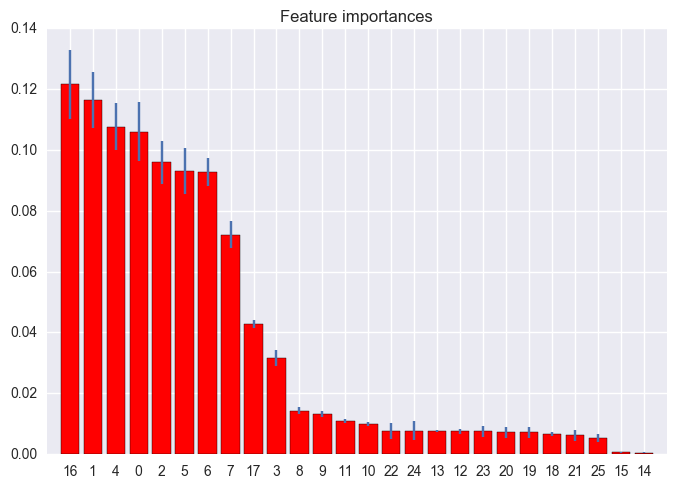

In [439]:
rf.fit(X, y)

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

cols = rf_input_data.columns
# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature n° %d %s (%f)" % (f + 1, indices[f], cols[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()  

We can see that the most important features are:
    - photoID
    - player
    - the birthday
    - playerShort
    
The result obtained is weird. Indeed, those 4 features seem to be independant of the color skin and they shloud also be unique to one player. PhotoID is the id of the photo and thus unique for one player. Same about 'player' and 'playerShort'. Birthday is not necessarily unique, but should not be that important in the classification of player.

We have to remember that our data contains dayads between player and referee, so it's mean that a player can appear several time in our data. It could be the reason why the name is deterministic. let's see some fact about the data

In [445]:
data.playerShort.value_counts()[:10]

djibril-cisse           202
john-arne-riise         197
javier-saviola          196
giorgios-karagounis     195
xavi                    188
helder-postiga          183
rafael-van-der-vaart    181
zlatan-ibrahimovic      181
simao                   180
ian-harte               177
Name: playerShort, dtype: int64

Indeed, some player appear 200 times, so it is easy to determine the color skin of djibril cisse if he appears both in the training set and in the test set. But in the reality the probability to have 2 djibril cisse with the same birthday and same color skin is almost null

# Drop some important Feature

In [441]:
rf_input_data_drop = rf_input_data.drop(['birthday', 'player','playerShort', 'photoID'], axis=1) 

rf_input_data_drop.dtypes

club               int64
leagueCountry      int64
height           float64
weight           float64
position           int64
games              int64
victories          int64
ties               int64
defeats            int64
goals              int64
yellowCards        int64
yellowReds         int64
redCards           int64
refNum             int64
refCountry         int64
Alpha_3            int64
meanIAT          float64
nIAT             float64
seIAT            float64
meanExp          float64
nExp             float64
seExp            float64
dtype: object

In [442]:
rf = RandomForestClassifier()
# roc_scorer = make_scorer(roc_curve)
X = rf_input_data_drop
y = player_colors
result = cross_val_score(rf, X, y, cv=10, n_jobs=3, pre_dispatch='n_jobs+1', verbose=3)

"""
kf = KFold(n_splits=10)
for train, test in kf.split(rf_input_data):
    X_train, X_test, y_train, y_test = rf_input_data[train], rf_input_data[test], player_colors[train], player_colors[test]
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
"""

result

[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV] ....................................... , score=0.771548 -   0.1s
[CV] ....................................... , score=0.866324 -   0.1s
[CV]  ................................................................
[CV]  ................................................................
[CV] ....................................... , score=0.844312 -   0.1s
[CV]  ................................................................
[CV] ....................................... , score=0.835382 -   0.1s
[CV]  ................................................................
[CV] ....................................... , score=0.857969 -   0.1s
[CV]  ................................................................
[CV] ....................................... , score=0.851450 -   0.1s
[CV]  

[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:   13.5s finished


array([ 0.77154792,  0.86632391,  0.84431234,  0.85796915,  0.83538202,
        0.85145015,  0.84438017,  0.87472881,  0.84114102,  0.73199936])

Feature ranking:
1. feature n° 3 weight (0.178321)
2. feature n° 2 height (0.174316)
3. feature n° 0 club (0.174290)
4. feature n° 4 position (0.132921)
5. feature n° 13 refNum (0.077175)
6. feature n° 1 leagueCountry (0.036401)
7. feature n° 5 games (0.030830)
8. feature n° 6 victories (0.027916)
9. feature n° 8 defeats (0.023867)
10. feature n° 7 ties (0.021034)
11. feature n° 10 yellowCards (0.018037)
12. feature n° 9 goals (0.017238)
13. feature n° 18 seIAT (0.011981)
14. feature n° 14 refCountry (0.010734)
15. feature n° 19 meanExp (0.010651)
16. feature n° 16 meanIAT (0.010496)
17. feature n° 21 seExp (0.010422)
18. feature n° 17 nIAT (0.010355)
19. feature n° 15 Alpha_3 (0.010340)
20. feature n° 20 nExp (0.009356)
21. feature n° 12 redCards (0.001790)
22. feature n° 11 yellowReds (0.001528)


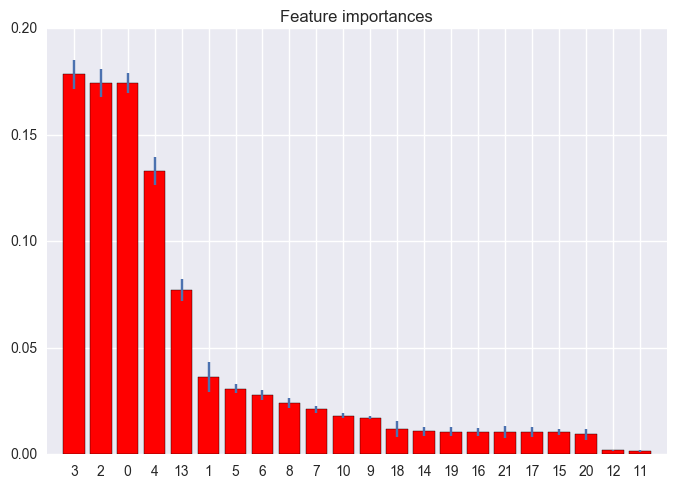

In [444]:
rf.fit(X, y)

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

cols = rf_input_data_drop.columns
# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature n° %d %s (%f)" % (f + 1, indices[f], cols[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()  